In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [302]:
os.chdir('C:/Storage/StudyJourney/Nam3/Cs114/Project2')

In [303]:
# Đọc dữ liệu
annonimized = pd.read_csv("Dataset/annonimized.csv")
tbtl = pd.read_excel("Dataset/public_it001/tbtl-public.ods", engine='odf')
th = pd.read_csv("Dataset/public_it001/th-public.csv")
qt = pd.read_csv("Dataset/public_it001/qt-public.csv")
CK = pd.read_csv("Dataset/public_it001/ck-public.csv")

## Xử lý dữ liệu annonimized

In [304]:
annonimized

,assignment_id,problem_id,username,is_final,status,pre_score,coefficient,language_id,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10/9/2025 8:02,10/9/2025 8:06,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10/9/2025 8:04,10/9/2025 8:04,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10/9/2025 8:06,10/9/2025 8:06,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10/9/2025 8:47,10/9/2025 8:48,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10/9/2025 9:19,10/9/2025 9:19,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,1/15/2025 16:03,1/15/2025 16:03,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,1/15/2025 16:04,1/15/2025 16:05,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func..."
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,1/15/2025 16:04,1/15/2025 16:05,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,1/15/2025 16:05,1/15/2025 16:05,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0..."


In [305]:
print(annonimized['status'].unique())

['SCORE' 'Compilation Error' 'pending' 'Syntax Error']


In [306]:
# Hàm xử lý cột `judgement` để rút trích các đặc trưng
import json

def extract_judgement_features(df):
    # Parse cột judgement thành dict với kiểm tra ngoại lệ
    def safe_json_loads(j):
        try:
            return json.loads(j) if isinstance(j, str) else {}
        except json.JSONDecodeError:
            return {}

    # Chuyển cột judgement sang dạng dict
    df['judgement_parsed'] = df['judgement'].apply(safe_json_loads)
    
    # Rút trích các giá trị từ judgement
    df['times'] = df['judgement_parsed'].apply(lambda x: x.get('times', []) if isinstance(x, dict) else [])
    df['mems'] = df['judgement_parsed'].apply(lambda x: x.get('mems', []) if isinstance(x, dict) else [])
    
    # Kiểm tra kiểu của verdicts và xử lý
    def extract_verdicts(verdicts):
        if isinstance(verdicts, dict):
            return verdicts.get('WRONG', 0)
        return 0  # Mặc định nếu verdicts không phải là dict

    df['verdicts'] = df['judgement_parsed'].apply(lambda x: x.get('verdicts', {}) if isinstance(x, dict) else {})
    df['wrong_testcases'] = df['verdicts'].apply(extract_verdicts)
    df['accepted'] = df['verdicts'].apply(lambda x: 1 if isinstance(x, list) else -1)

    return df

def process_times_and_mems(df):
    df['times_mean'] = df['times'].apply(lambda x: sum(x) / len(x) if x else -1)
    df['mems_mean'] = df['mems'].apply(lambda x: sum(x) / len(x) if x else -1)
    return df

In [307]:
from datetime import datetime
from scipy import stats

# Hàm chuyển đổi thời gian với ngày tham chiếu
reference_date = datetime(2024, 1, 1)

# Chuyển đổi 'created_at' và 'updated_at' thành ordinal và thêm đặc trưng chênh lệch ngày
annonimized['created_at'] = pd.to_datetime(annonimized['created_at'], errors='coerce')
annonimized['updated_at'] = pd.to_datetime(annonimized['updated_at'], errors='coerce')
annonimized['created_at_ordinal'] = (annonimized['created_at'] - reference_date).dt.days
annonimized['updated_at_ordinal'] = (annonimized['updated_at'] - reference_date).dt.days
annonimized['date_diff'] = (annonimized['updated_at'] - annonimized['created_at']).dt.total_seconds()

# Z-score và kiểm tra ngoại lệ
annonimized['z_score'] = stats.zscore(annonimized['pre_score'])
annonimized['is_outlier'] = annonimized['z_score'].apply(lambda x: 1 if abs(x) > 3 else 0)

# Đặc trưng hoạt động theo giờ
annonimized['hour'] = annonimized['created_at'].dt.hour
hourly_activity = annonimized.groupby(['username', 'assignment_id', 'problem_id'])['hour'].value_counts().unstack(fill_value=0).reset_index()

# Label encoding cho cột 'status'
label_encoder = LabelEncoder()

# Thêm các đặc trưng tổng hợp
annonimized['submission_time_diff'] = annonimized.groupby(['username', 'assignment_id', 'problem_id'])['created_at'].diff().dt.total_seconds()
annonimized['avg_submission_time_diff'] = annonimized.groupby(['username', 'assignment_id', 'problem_id'])['submission_time_diff'].transform('mean')


annonimized['status_encoded'] = label_encoder.fit_transform(annonimized['status'])

annonimized['submission_count'] = annonimized.groupby('username')['is_final'].transform('count')

annonimized['avg_pre_score'] = annonimized.groupby('username')['pre_score'].transform('mean')

annonimized['avg_score_per_submission'] = annonimized['avg_pre_score'] / (annonimized['submission_count'] + 1e-5)  # Tránh chia cho 0

annonimized['is_final_ratio'] = annonimized['is_final'] / annonimized['submission_count']

annonimized['problem_final_ratio'] = annonimized.groupby(
    ['username', 'assignment_id', 'problem_id'])['is_final'].transform(lambda x: x.sum() / (len(x) + 1e-5))

annonimized['problem_submission_count'] = annonimized.groupby(
    ['username', 'assignment_id', 'problem_id'])['is_final'].transform('count')

# user_count = annonimized.groupby(['username', 'assignment_id', 'problem_id']).size().reset_index(name='user_count')

# total_count = annonimized.groupby(['assignment_id', 'problem_id']).size().reset_index(name='total_count')

# total_count = total_count.merge(user_count, on=['assignment_id', 'problem_id'])

# annonimized['ratio_in_assignment'] = (total_count['user_count'] / total_count['total_count']) * 100

annonimized = extract_judgement_features(annonimized)
annonimized = process_times_and_mems(annonimized)

annonimized = annonimized.groupby('username').agg({
    'status_encoded': 'mean',
    'is_final': 'mean',
    'avg_submission_time_diff': 'mean',
    'wrong_testcases': 'mean',
    'accepted': 'mean',
    'created_at_ordinal': 'mean',
    'updated_at_ordinal': 'mean',
    # 'date_diff': 'mean',
    'hour': 'mean',
    'z_score': 'mean',
    'is_outlier': 'mean',
    'submission_count': 'mean',
    'avg_pre_score': 'mean',
    'avg_score_per_submission': 'mean',
    'is_final_ratio': 'mean',
    'problem_final_ratio': 'mean',
    'problem_submission_count': 'mean',
    # 'error_rate': 'mean',
    # 'times_mean': 'mean',
    # 'mems_mean': 'mean',
    # 'ratio_in_assignment': 'mean'
}).reset_index()

# Nhóm và tổng hợp các đặc trưng
features = ['username', 'status_encoded', 'is_final', 'submission_count', 'avg_pre_score', 
            'avg_score_per_submission', 'is_final_ratio',
            'avg_submission_time_diff', 'problem_final_ratio', 'wrong_testcases', 
            'accepted', 'created_at_ordinal', 'updated_at_ordinal', 
            'hour', 'problem_submission_count']

features_nouser = ['status_encoded', 'is_final', 'submission_count', 'avg_pre_score', 
            'avg_score_per_submission', 'is_final_ratio',
            'avg_submission_time_diff', 'problem_final_ratio', 'wrong_testcases', 
            'accepted', 'created_at_ordinal', 'updated_at_ordinal', 
            'hour', 'problem_submission_count']


annonimized = annonimized[features]


In [308]:
print(annonimized.dtypes)

username                     object
status_encoded              float64
is_final                    float64
submission_count            float64
avg_pre_score               float64
avg_score_per_submission    float64
is_final_ratio              float64
avg_submission_time_diff    float64
problem_final_ratio         float64
wrong_testcases             float64
accepted                    float64
created_at_ordinal          float64
updated_at_ordinal          float64
hour                        float64
problem_submission_count    float64
dtype: object


In [309]:
annonimized

,username,status_encoded,is_final,submission_count,avg_pre_score,avg_score_per_submission,is_final_ratio,avg_submission_time_diff,problem_final_ratio,wrong_testcases,accepted,created_at_ordinal,updated_at_ordinal,hour,problem_submission_count
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,0.809524,0.312925,147.0,5504.149660,37.443192,0.002129,10457.214835,0.312923,3.006803,-0.265306,578.557823,578.646259,4.401361,5.136054
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,0.806950,0.301158,259.0,5488.552124,21.191320,0.001163,-285578.146039,0.301157,1.918919,-0.343629,610.610039,607.899614,10.525097,6.158301
2,01122b3ef7e59b84189e65985305f575d6bdf83c,0.897436,0.343590,195.0,5973.753846,30.634634,0.001762,-137070.811005,0.343587,4.615385,-0.394872,647.066667,645.871795,10.964103,9.328205
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,0.760000,0.470000,100.0,5952.760000,59.527594,0.004700,2357.547945,0.469997,1.640000,0.040000,485.800000,485.820000,8.610000,4.160000
4,013de369c439ab0ead8aa7da64423aa395a8be39,0.878505,0.616822,107.0,6474.448598,60.508860,0.005765,1524.267241,0.616817,1.691589,0.102804,616.336449,616.336449,8.598131,2.794393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,0.959459,0.459459,74.0,5581.081081,75.420004,0.006209,2876.546296,0.459456,0.432432,0.081081,527.918919,527.918919,9.351351,3.783784
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,0.830769,0.300000,260.0,6204.557692,23.863683,0.001154,21582.085134,0.299998,2.430769,-0.384615,559.823077,559.923077,7.046154,7.384615
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,0.823799,0.235698,437.0,4998.466819,11.438139,0.000539,-180311.172735,0.235697,3.073227,-0.519451,613.553776,612.260870,11.080092,12.643021
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,0.787234,0.361702,94.0,4343.329787,46.205631,0.003848,13222.674107,0.361700,4.212766,-0.361702,615.521277,615.627660,10.691489,4.808511


In [310]:
# Huấn luyện và đánh giá mô hình
models = {
    'LinearRegression': LinearRegression(),
    # 'xgb_model' : xgb.XGBRegressor(n_estimators=130, learning_rate=0.1, max_depQT=10, random_state=42),
    # 'gbr_model' : GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    # 'RandomForest': RandomForestRegressor(random_state=42),
    # 'lgbm': LGBMRegressor(random_state=42),
    # # 'cb': CatBoostRegressor(verbose=0, random_state=42),
    # 'hist_gbr': HistGradientBoostingRegressor(random_state=42)
}

## data TBTL

In [311]:
# Merge dữ liệu bằng username từ annonimized và tbtl
data_tbtl = annonimized.merge(tbtl, on="username", how="left")

In [312]:
data_tbtl['TBTL'] = data_tbtl.groupby('username')['TBTL'].mean().values

In [313]:
# Phân tách dữ liệu
train_test_data_tbtl = data_tbtl[data_tbtl['TBTL'].notna()]  # Sinh viên có điểm dùng để train
predict_data_tbtl = data_tbtl[data_tbtl['TBTL'].isna()]  # Sinh viên không có điểm dùng để dự đoán

# In số lượng
print(f"Số lượng sinh viên có điểm (train): {train_test_data_tbtl.shape[0]}")
print(f"Số lượng sinh viên cần dự đoán: {predict_data_tbtl.shape[0]}")

Số lượng sinh viên có điểm (train): 799
Số lượng sinh viên cần dự đoán: 690


### Train test data tbtl

In [314]:
X_train_test_data_tbtl = train_test_data_tbtl[features_nouser]
y_train_test_data_tbtl = train_test_data_tbtl['TBTL']

In [315]:
nan_columns = X_train_test_data_tbtl.columns[X_train_test_data_tbtl.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_train_test_data_tbtl.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_train_test_data_tbtl[nan_columns] = X_train_test_data_tbtl[nan_columns].fillna(X_train_test_data_tbtl[nan_columns].mean())

Các cột chứa NaN: ['avg_submission_time_diff']
Số lượng NaN trong mỗi cột:
avg_submission_time_diff    13
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_247112\807125407.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_test_data_tbtl[nan_columns] = X_train_test_data_tbtl[nan_columns].fillna(X_train_test_data_tbtl[nan_columns].mean())


In [316]:
X_train_test_data_tbtl

,status_encoded,is_final,submission_count,avg_pre_score,avg_score_per_submission,is_final_ratio,avg_submission_time_diff,problem_final_ratio,wrong_testcases,accepted,created_at_ordinal,updated_at_ordinal,hour,problem_submission_count
0,0.809524,0.312925,147.0,5504.149660,37.443192,0.002129,10457.214835,0.312923,3.006803,-0.265306,578.557823,578.646259,4.401361,5.136054
1,0.806950,0.301158,259.0,5488.552124,21.191320,0.001163,-285578.146039,0.301157,1.918919,-0.343629,610.610039,607.899614,10.525097,6.158301
2,0.897436,0.343590,195.0,5973.753846,30.634634,0.001762,-137070.811005,0.343587,4.615385,-0.394872,647.066667,645.871795,10.964103,9.328205
3,0.760000,0.470000,100.0,5952.760000,59.527594,0.004700,2357.547945,0.469997,1.640000,0.040000,485.800000,485.820000,8.610000,4.160000
4,0.878505,0.616822,107.0,6474.448598,60.508860,0.005765,1524.267241,0.616817,1.691589,0.102804,616.336449,616.336449,8.598131,2.794393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.729730,0.396396,111.0,5171.639640,46.591344,0.003571,43576.582792,0.396394,2.225225,-0.261261,669.531532,669.819820,10.063063,4.135135
797,0.711485,0.291317,357.0,4785.224090,13.403989,0.000816,-141521.664440,0.291315,2.316527,-0.394958,659.291317,657.952381,10.151261,6.394958
798,0.754839,0.341935,155.0,4247.296774,27.401913,0.002206,69580.419092,0.341933,3.206452,-0.393548,647.670968,648.206452,8.225806,8.819355
799,0.746858,0.206463,557.0,4278.605027,7.681517,0.000371,-61745.963034,0.206462,3.427289,-0.594255,653.673250,653.116697,7.561939,10.188510


In [317]:
#Chuẩn hóa dữ liệu
scaler = StandardScaler()
# X_train_test_data_tbtl = scaler.fit_transform(X_train_test_data_tbtl)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_train_test_data_tbtl, y_train_test_data_tbtl, test_size=0.3, random_state=42)

In [318]:
X_train

,status_encoded,is_final,submission_count,avg_pre_score,avg_score_per_submission,is_final_ratio,avg_submission_time_diff,problem_final_ratio,wrong_testcases,accepted,created_at_ordinal,updated_at_ordinal,hour,problem_submission_count
405,0.770115,0.425287,261.0,5779.333333,22.143039,0.001629,5.493445e+04,0.425284,2.022989,-0.164751,663.072797,663.413793,8.475096,4.463602
523,0.797980,0.348485,198.0,5448.974747,27.520073,0.001760,4.695213e+03,0.348483,2.383838,-0.212121,623.984848,624.025253,11.313131,6.131313
750,0.699115,0.495575,113.0,2888.132743,25.558695,0.004386,1.031360e+04,0.495572,4.070796,-0.610619,587.831858,587.920354,10.831858,3.230088
427,0.920354,0.433628,226.0,6430.331858,28.452795,0.001919,5.704235e+04,0.433625,2.778761,-0.123894,621.570796,621.955752,9.207965,5.389381
41,0.743902,0.260163,246.0,4425.292683,17.988994,0.001058,-1.563043e+05,0.260161,3.048780,-0.439024,595.329268,595.434959,9.093496,8.934959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.740000,0.505000,200.0,5469.190000,27.345949,0.002525,-1.126410e+06,0.504996,1.970000,-0.050000,625.045000,620.310000,12.470000,3.130000
106,0.803681,0.306748,163.0,5293.950920,32.478225,0.001882,7.365464e+03,0.306747,2.883436,-0.325153,640.355828,640.404908,8.355828,6.656442
270,0.807771,0.271984,489.0,4677.613497,9.565672,0.000556,-3.837036e+04,0.271982,3.347648,-0.415133,603.507157,602.895706,9.867076,9.678937
436,0.677019,0.211180,161.0,2112.559006,13.121484,0.001312,2.017122e+04,0.211179,4.826087,-0.751553,655.695652,655.801242,9.987578,9.322981


In [319]:
y_train 

405    7.71
523    7.50
750    7.74
427    8.04
41     8.63
       ... 
71     7.11
106    7.93
270    9.15
436    7.32
102    8.10
Name: TBTL, Length: 559, dtype: float64

In [320]:

metrics = {}

for name, model in models.items():
    # Huấn luyện
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Đánh giá
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {
        'MSE': mse,
        'R2': r2
    }

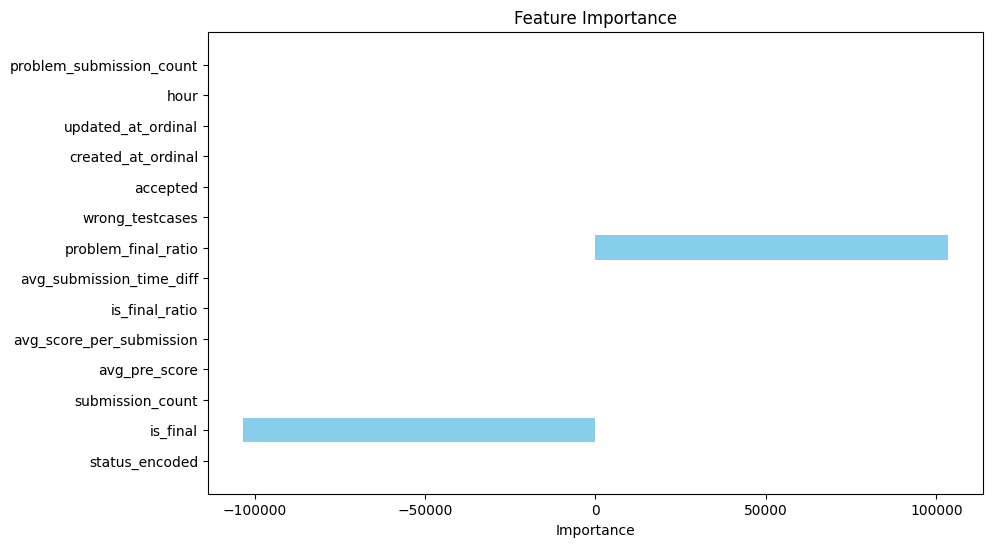

In [321]:
# Mức độ quan trọng của các đặc trưng
importances = model.coef_
features = X_train_test_data_tbtl.columns

# Vẽ biểu đồ mức độ quan trọng
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [322]:
# In kết quả
print("Model Evaluation Results of TBTL:")
for name, metrics in metrics.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

Model Evaluation Results of TBTL:
LinearRegression: MSE=0.6824, R2=0.1320


### Predict data tbtl

In [323]:
X_predict_data_tbtl = predict_data_tbtl[features_nouser]

In [324]:
nan_columns = X_predict_data_tbtl.columns[X_predict_data_tbtl.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_predict_data_tbtl.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_predict_data_tbtl[nan_columns] = X_predict_data_tbtl[nan_columns].fillna(X_predict_data_tbtl[nan_columns].mean())

Các cột chứa NaN: ['avg_submission_time_diff']
Số lượng NaN trong mỗi cột:
avg_submission_time_diff    7
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_247112\928285070.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict_data_tbtl[nan_columns] = X_predict_data_tbtl[nan_columns].fillna(X_predict_data_tbtl[nan_columns].mean())


In [325]:
X_predict_data_tbtl = scaler.fit_transform(X_predict_data_tbtl)

In [326]:
# Dự đoán
predict_data_tbtl['TBTL'] = model.predict(X_predict_data_tbtl)


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_247112\3950690568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data_tbtl['TBTL'] = model.predict(X_predict_data_tbtl)


In [327]:

output = predict_data_tbtl[['username', 'TBTL']]

# Xuất file kết quả
output = output.to_csv("Predict/predicted_tbtl.csv", index=False, header=False)

## data TH


In [328]:
# Merge dữ liệu bằng username từ annonimized và th
data_th = annonimized.merge(th, on="username", how="left")

In [329]:
data_th['TH'] = pd.to_numeric(data_th['TH'], errors='coerce')
data_th['TH'] = data_th.groupby('username')['TH'].mean().values

In [330]:
# Phân tách dữ liệu
train_test_data_th = data_th[data_th['TH'].notna()]  # Sinh viên có điểm dùng để train
predict_data_th = data_th[data_th['TH'].isna()]  # Sinh viên không có điểm dùng để dự đoán

# In số lượng
print(f"Số lượng sinh viên có điểm (train): {train_test_data_th.shape[0]}")
print(f"Số lượng sinh viên cần dự đoán: {predict_data_th.shape[0]}")

Số lượng sinh viên có điểm (train): 753
Số lượng sinh viên cần dự đoán: 736


### Train test data th

In [331]:
X_train_test_data_th = train_test_data_th[features_nouser]
y_train_test_data_th = train_test_data_th['TH']

In [332]:
nan_columns = X_train_test_data_th.columns[X_train_test_data_th.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_train_test_data_th.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_train_test_data_th[nan_columns] = X_train_test_data_th[nan_columns].fillna(X_train_test_data_th[nan_columns].mean())

Các cột chứa NaN: ['avg_submission_time_diff']
Số lượng NaN trong mỗi cột:
avg_submission_time_diff    13
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_247112\2751891394.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_test_data_th[nan_columns] = X_train_test_data_th[nan_columns].fillna(X_train_test_data_th[nan_columns].mean())


In [333]:
#Chuẩn hóa dữ liệu
# X_train_test_data_th = scaler.fit_transform(X_train_test_data_th)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_train_test_data_th, y_train_test_data_th, test_size=0.3, random_state=42)

In [334]:
# Huấn luyện và đánh giá mô hình
metrics = {}

for name, model in models.items():
    # Huấn luyện
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Đánh giá
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {
        'MSE': mse,
        'R2': r2
    }

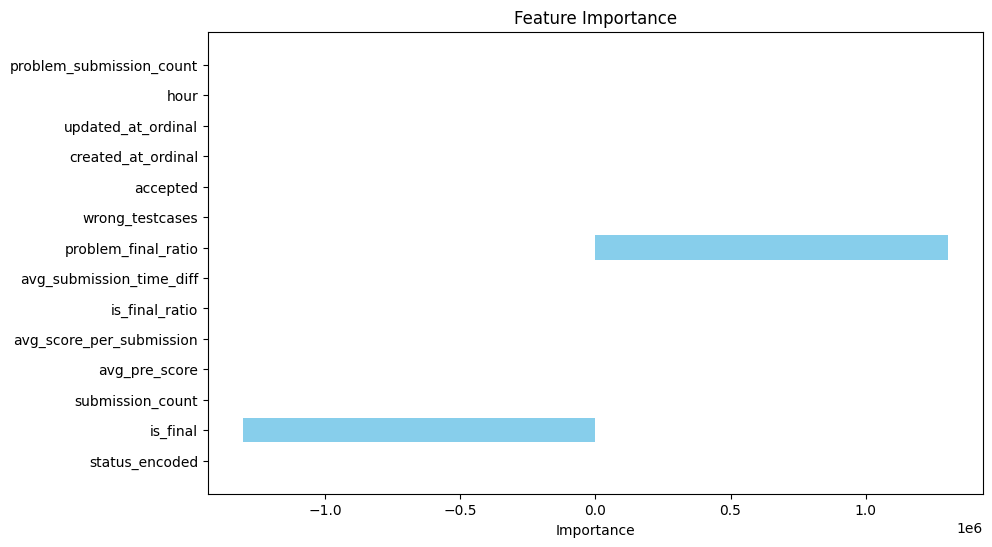

In [335]:
# Mức độ quan trọng của các đặc trưng
importances = model.coef_
features = X_train_test_data_th.columns

# Vẽ biểu đồ mức độ quan trọng
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [336]:
# In kết quả
print("Model Evaluation Results of TH:")
for name, metrics in metrics.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

Model Evaluation Results of TH:
LinearRegression: MSE=3.1335, R2=0.3721


### Predict data th

In [337]:
X_predict_data_th = predict_data_th[features_nouser]

In [338]:
nan_columns = X_predict_data_th.columns[X_predict_data_th.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_predict_data_th.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_predict_data_th[nan_columns] = X_predict_data_th[nan_columns].fillna(X_predict_data_th[nan_columns].mean())

Các cột chứa NaN: ['avg_submission_time_diff']
Số lượng NaN trong mỗi cột:
avg_submission_time_diff    7
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_247112\1144068623.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict_data_th[nan_columns] = X_predict_data_th[nan_columns].fillna(X_predict_data_th[nan_columns].mean())


In [339]:
X_predict_data_th = scaler.transform(X_predict_data_th)

In [340]:
# Dự đoán
predict_data_th['TH'] = model.predict(X_predict_data_th)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_247112\1421566909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data_th['TH'] = model.predict(X_predict_data_th)


In [341]:

output = predict_data_th[['username', 'TH']]

# Xuất file kết quả
output = output.to_csv("Predict/predicted_th.csv", index=False, header=False)

## data QT

In [342]:
# Merge dữ liệu bằng username từ annonimized và qt
data_qt = annonimized.merge(qt, on="username", how="left")

In [343]:
data_qt['QT'] = pd.to_numeric(data_qt['QT'], errors='coerce')
data_qt['QT'] = data_qt.groupby('username')['QT'].mean().values

In [344]:
# Phân tách dữ liệu
train_test_data_qt = data_qt[data_qt['QT'].notna()]  # Sinh viên có điểm dùng để train
predict_data_qt = data_qt[data_qt['QT'].isna()]  # Sinh viên không có điểm dùng để dự đoán

# In số lượng
print(f"Số lượng sinh viên có điểm (train): {train_test_data_qt.shape[0]}")
print(f"Số lượng sinh viên cần dự đoán: {predict_data_qt.shape[0]}")

Số lượng sinh viên có điểm (train): 754
Số lượng sinh viên cần dự đoán: 735


### Train test data qt

In [345]:
X_train_test_data_qt = train_test_data_qt[features_nouser]
y_train_test_data_qt = train_test_data_qt['QT']

In [346]:
# fill NaN
nan_columns = X_train_test_data_qt.columns[X_train_test_data_qt.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_train_test_data_qt.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_train_test_data_qt[nan_columns] = X_train_test_data_qt[nan_columns].fillna(X_train_test_data_qt[nan_columns].mean())

Các cột chứa NaN: ['avg_submission_time_diff']
Số lượng NaN trong mỗi cột:
avg_submission_time_diff    13
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_247112\2698798050.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_test_data_qt[nan_columns] = X_train_test_data_qt[nan_columns].fillna(X_train_test_data_qt[nan_columns].mean())


In [347]:
#Chuẩn hóa dữ liệu
# X_train_test_data_qt = scaler.fit_transform(X_train_test_data_qt)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_train_test_data_qt, y_train_test_data_qt, test_size=0.3, random_state=42)

In [348]:
# Huấn luyện và đánh giá mô hình

metrics = {}

for name, model in models.items():
    # Huấn luyện
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Đánh giá
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {
        'MSE': mse,
        'R2': r2
    }

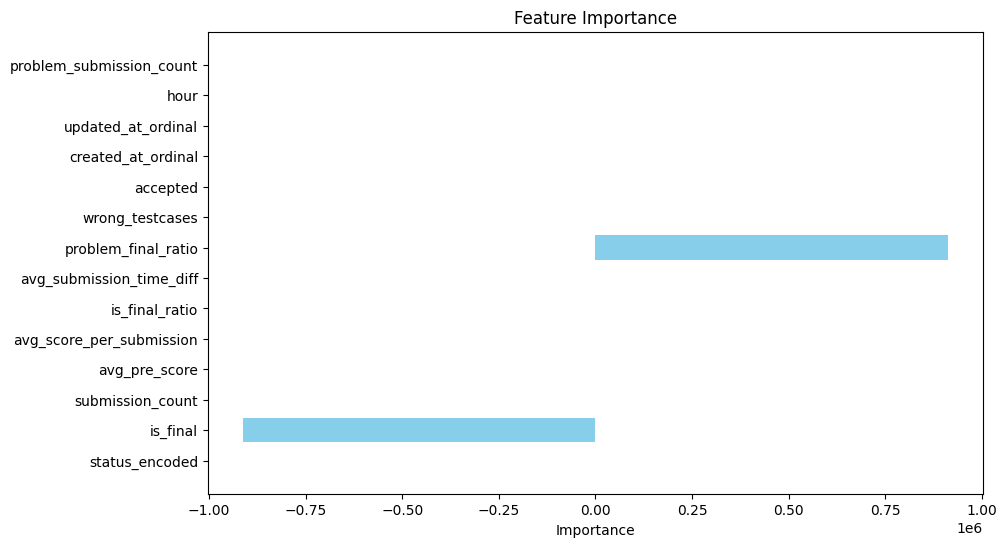

In [349]:
# Mức độ quan trọng của các đặc trưng
importances = model.coef_
features = X_train_test_data_qt.columns

# Vẽ biểu đồ mức độ quan trọng
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [350]:
# In kết quả
print("Model Evaluation Results of QT:")
for name, metrics in metrics.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

Model Evaluation Results of QT:
LinearRegression: MSE=2.3920, R2=-0.0116


### Predict data qt

In [351]:
X_predict_data_qt = predict_data_qt[features_nouser]

In [352]:
nan_columns = X_predict_data_qt.columns[X_predict_data_qt.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_predict_data_qt.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_predict_data_qt[nan_columns] = X_predict_data_qt[nan_columns].fillna(X_predict_data_qt[nan_columns].mean())

Các cột chứa NaN: ['avg_submission_time_diff']
Số lượng NaN trong mỗi cột:
avg_submission_time_diff    7
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_247112\2015593243.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict_data_qt[nan_columns] = X_predict_data_qt[nan_columns].fillna(X_predict_data_qt[nan_columns].mean())


In [353]:
X_predict_data_qt = scaler.transform(X_predict_data_qt)

In [354]:
# Dự đoán
predict_data_qt['QT'] = model.predict(X_predict_data_qt)


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_247112\3031361918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data_qt['QT'] = model.predict(X_predict_data_qt)


In [355]:

output = predict_data_qt[['username', 'QT']]

# Xuất file kết quả
output = output.to_csv("Predict/predicted_qt.csv", index=False, header=False)

## data CK

In [356]:
# Merge dữ liệu bằng username từ annonimized và ck
data_CK = annonimized.merge(CK, on="username", how="left")

In [357]:
data_CK['CK'] = data_CK.groupby('username')['CK'].mean().values

In [358]:
# Phân tách dữ liệu
train_test_data_ck = data_CK[data_CK['CK'].notna()]  # Sinh viên có điểm dùng để train
predict_data_ck = data_CK[data_CK['CK'].isna()]  # Sinh viên không có điểm dùng để dự đoán

# In số lượng
print(f"Số lượng sinh viên có điểm (train): {train_test_data_ck.shape[0]}")
print(f"Số lượng sinh viên cần dự đoán: {predict_data_ck.shape[0]}")

Số lượng sinh viên có điểm (train): 755
Số lượng sinh viên cần dự đoán: 734


### Train test data ck

In [359]:
X_train_test_data_ck = train_test_data_ck[features_nouser]
y_train_test_data_ck = train_test_data_ck['CK']

In [360]:
nan_columns = X_train_test_data_ck.columns[X_train_test_data_ck.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_train_test_data_ck.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_train_test_data_ck[nan_columns] = X_train_test_data_ck[nan_columns].fillna(X_train_test_data_ck[nan_columns].mean())

Các cột chứa NaN: ['avg_submission_time_diff']
Số lượng NaN trong mỗi cột:
avg_submission_time_diff    13
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_247112\3306873973.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_test_data_ck[nan_columns] = X_train_test_data_ck[nan_columns].fillna(X_train_test_data_ck[nan_columns].mean())


In [361]:
#Chuẩn hóa dữ liệu
# X_train_test_data_ck = scaler.fit_transform(X_train_test_data_ck)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_train_test_data_ck, y_train_test_data_ck, test_size=0.3, random_state=42)

In [362]:
# Huấn luyện và đánh giá mô hình
metrics = {}

for name, model in models.items():
    # Huấn luyện
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Đánh giá
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {
        'MSE': mse,
        'R2': r2
    }

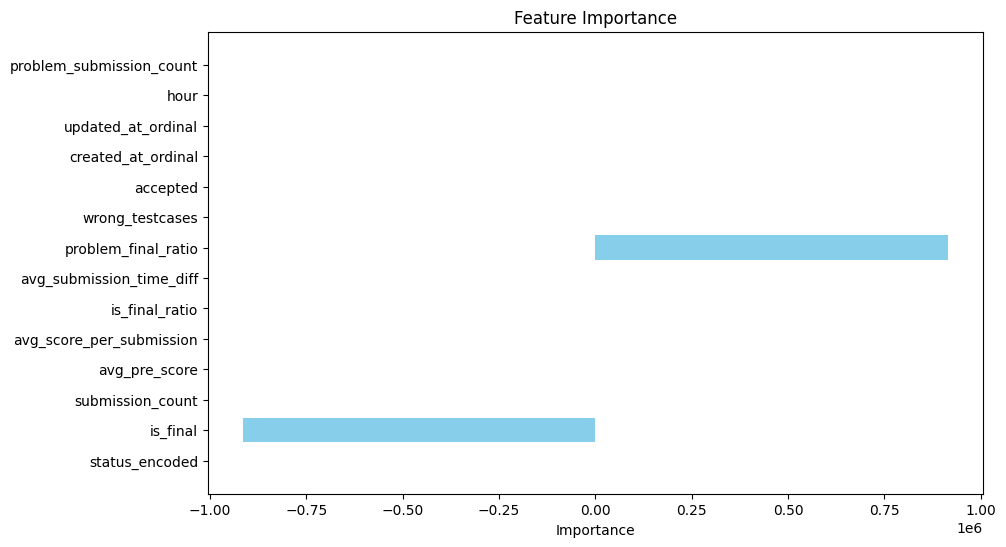

In [363]:
# Mức độ quan trọng của các đặc trưng
importances = model.coef_
features = X_train_test_data_ck.columns

# Vẽ biểu đồ mức độ quan trọng
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [364]:
# In kết quả
print("Model Evaluation Results of CK:")
for name, metrics in metrics.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

Model Evaluation Results of CK:
LinearRegression: MSE=3.7278, R2=0.1913


### Predict data ck

In [365]:
X_predict_data_ck = predict_data_ck[features_nouser]

In [366]:
nan_columns = X_predict_data_ck.columns[X_predict_data_ck.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_predict_data_ck.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_predict_data_ck[nan_columns] = X_predict_data_ck[nan_columns].fillna(X_predict_data_ck[nan_columns].mean())

Các cột chứa NaN: ['avg_submission_time_diff']
Số lượng NaN trong mỗi cột:
avg_submission_time_diff    7
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_247112\2984709394.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict_data_ck[nan_columns] = X_predict_data_ck[nan_columns].fillna(X_predict_data_ck[nan_columns].mean())


In [367]:
X_predict_data_ck = scaler.transform(X_predict_data_ck)

In [368]:
# Dự đoán
predict_data_ck['CK'] = model.predict(X_predict_data_ck)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_247112\3428818030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data_ck['CK'] = model.predict(X_predict_data_ck)


In [369]:

output = predict_data_ck[['username', 'CK']]

# Xuất file kết quả
output = output.to_csv("Predict/predicted_ck.csv", index=False, header=False)